# H1-B VISA 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib
import seaborn as sns
from subprocess import check_output
from matplotlib.ticker import FuncFormatter
init_notebook_mode(connected=True)
from plotly import tools
import warnings
warnings.simplefilter("ignore")

In [5]:
chunks = pd.read_csv("E:/sakshi/all subjects of MS/Trimester 4/H1BData2019.csv", chunksize=100000,low_memory=False)
df = pd.concat(chunks)

In [6]:
#Shape(Rows and Columns) of dataset
df.shape

(1048547, 260)

In [9]:
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-18275-977643,CERTIFIED,10/02/2018 17:34:00,10/9/2018,NaN,H-1B,SQL SERVER ENGINEER 3,15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",Y,...,NaN,NaN,NaN,NaN,Y,N,Y,NaN,NaN,PLACE OF BUSINESS
1,I-200-18277-004855,CERTIFIED,10/05/2018 10:57:39,10/12/2018,NaN,H-1B,CUSTOMER PROJECT MANAGER,15-1143,COMPUTER NETWORK ARCHITECTS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS
2,I-200-18268-552440,CERTIFIED,10/05/2018 17:33:27,10/12/2018,NaN,H-1B,TECHNICAL LEAD,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,NaN,NaN,NaN,NaN,Y,N,Y,NaN,NaN,PLACE OF BUSINESS
3,I-200-18277-155340,CERTIFIED,10/05/2018 19:11:24,10/12/2018,NaN,H-1B,SYSTEMS RELIABILITY ENGINEER,17-2071,ELECTRICAL ENGINEERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS
4,I-200-18281-328814,CERTIFIED,10/08/2018 09:55:13,10/12/2018,NaN,H-1B,PROGRAM MANAGER - RESEARCH,19-1042,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS


### DROP the useless columns.
- By examining the above two columns we can remove all the useless columns.
- Since we have a lot of those columns to drop, I instead selected the ones I need

In [10]:
to_select = ['CASE_STATUS', 'PERIOD_OF_EMPLOYMENT_START_DATE','EMPLOYER_NAME', 'EMPLOYER_STATE','JOB_TITLE', 'SOC_TITLE','FULL_TIME_POSITION',
            'PREVAILING_WAGE_1','PW_UNIT_OF_PAY_1','WORKSITE_STATE_1']

In [11]:
df = df[to_select]

## Dealing with missing values
- The following method is same as dropna.

In [12]:
df = df[df['PERIOD_OF_EMPLOYMENT_START_DATE'].notnull()]
df = df[df['JOB_TITLE'].notnull()]
df = df[df['SOC_TITLE'].notnull()]
df = df[df['FULL_TIME_POSITION'].notnull()]
df = df[df['PW_UNIT_OF_PAY_1'].notnull()]
df = df[df['WORKSITE_STATE_1'].notnull()]
df = df[df['EMPLOYER_NAME'].notnull()]

In [13]:
df.head()

,CASE_STATUS,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE_1,PW_UNIT_OF_PAY_1,WORKSITE_STATE_1
0,CERTIFIED,10/10/2018,"KRONSYS, INC.",NC,SQL SERVER ENGINEER 3,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",Y,84219.0,Year,OH
1,CERTIFIED,10/15/2018,ERICSSON INC,TX,CUSTOMER PROJECT MANAGER,COMPUTER NETWORK ARCHITECTS,Y,86070.0,Year,CA
2,CERTIFIED,10/09/2018,"SAAMA TECHNOLOGIES, INC.",CA,TECHNICAL LEAD,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,109825.0,Year,CA
3,CERTIFIED,10/29/2018,NUTANIX INC.,CA,SYSTEMS RELIABILITY ENGINEER,ELECTRICAL ENGINEERS,Y,103210.0,Year,CA
4,CERTIFIED,11/01/2018,THE UNIVERSITY OF TEXAS HEALTH SCIENCE CENTER ...,TX,PROGRAM MANAGER - RESEARCH,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",Y,47050.0,Year,TX


In [14]:
df.groupby(['FULL_TIME_POSITION','PW_UNIT_OF_PAY_1']).describe()['PREVAILING_WAGE_1']

count          mean           std  \
FULL_TIME_POSITION PW_UNIT_OF_PAY_1                                         
N                  Hour               10750.0     38.340150     26.432365   
                   Week                   1.0    621.000000           NaN   
                   Year                 105.0  74213.180952  37718.809416   
Y                  Bi-Weekly             92.0   4136.342500   6909.652647   
                   Hour               32143.0    112.649071   2487.443080   
                   Month                237.0  10949.629409  19962.893512   
                   Week                 125.0   1361.073600    558.445479   
                   Year              587895.0  90539.971359  28744.971287   

                                          min       25%       50%        75%  \
FULL_TIME_POSITION PW_UNIT_OF_PAY_1                                            
N                  Hour                  8.73     27.57     33.84      42.07   
                   Week                621.00    621.00    621.00     621.00   
                   Year              15000.00  47674.00  71510.00   83616.00   
Y                  Bi-Weekly            19.23   2152.85   2515.50    3855.50   
                   Hour                  7.25     33.38     39.07      45.98   
                   Month              1915.80   4181.67   5574.00    8154.00   
                   Week                350.00   1095.00   1278.00    1471.00   
                   Year              12882.00  72966.00  85987.00  104790.00   

                                          max  
FULL_TIME_POSITION PW_UNIT_OF_PAY_1            
N                  Hour                2018.0  
                   Week                 621.0  
                   Year              188032.0  
Y                  Bi-Weekly          56000.0  
                   Hour              135283.0  
                   Month             132184.0  
                   Week                4171.0  
                   Year              849680.0

### To make our analysis easy lets first convert the Monthly, Weekly and Bi-weekly pay to Annual pay
- The hourly pay conversion takes a lot of time. So, i have done in following stages after outliers were removed.
- Montly pay is multiplied by 12. ( As we have 12 months in a year)
- Weekly pay is multiplied by 48. ( Even though we have 52 weeks per year, I felt this might be better)
- Bi-Weekly pay is multiplied by 24. ( As we have two bi-weeks in a month)

In [15]:
for i in df.index:   
        if df.loc[i,'PW_UNIT_OF_PAY_1'] == 'Month':
            df.loc[i,'PREVAILING_WAGE_1'] = df.loc[i,'PREVAILING_WAGE_1'] * 12
        if df.loc[i,'PW_UNIT_OF_PAY_1'] == 'Week':
            df.loc[i,'PREVAILING_WAGE_1'] = df.loc[i,'PREVAILING_WAGE_1'] * 48
        if df.loc[i,'PW_UNIT_OF_PAY_1'] == 'Bi-Weekly':
            df.loc[i,'PREVAILING_WAGE_1'] = df.loc[i,'PREVAILING_WAGE_1'] * 24

#### Replace the names bi-weekly, month and week by year.

In [16]:
df.PW_UNIT_OF_PAY_1.replace(['Bi-Weekly','Month','Week'],['Year','Year','Year'], inplace=True)

#### Checking again.
- Now you that we have unit of pay in hour and year only.

In [17]:
df.groupby(['FULL_TIME_POSITION','PW_UNIT_OF_PAY_1']).describe()['PREVAILING_WAGE_1']

count          mean           std  \
FULL_TIME_POSITION PW_UNIT_OF_PAY_1                                         
N                  Hour               10750.0     38.340150     26.432365   
                   Year                 106.0  73794.264151  37785.725540   
Y                  Hour               32143.0    112.649071   2487.443080   
                   Year              588349.0  90552.438594  29221.205885   

                                          min       25%       50%        75%  \
FULL_TIME_POSITION PW_UNIT_OF_PAY_1                                            
N                  Hour                  8.73     27.57     33.84      42.07   
                   Year              15000.00  47674.00  70262.00   83547.00   
Y                  Hour                  7.25     33.38     39.07      45.98   
                   Year                461.52  72966.00  85987.00  104790.00   

                                           max  
FULL_TIME_POSITION PW_UNIT_OF_PAY_1             
N                  Hour                 2018.0  
                   Year               188032.0  
Y                  Hour               135283.0  
                   Year              1586208.0

#### Creating a new dummy column
- As, we are going to deal with a lot of groupby methods below, it will be easy for us if we have a count column.

In [18]:
df['countvar'] = 1

# Plotly Charts

### Top Employers sponsoring H1-B's
- The plots are made using plotly which are interactive. So, you can hover over the plot to know more details

In [19]:
dftop = df.groupby('EMPLOYER_NAME',as_index=False).count()
dftop = dftop.sort_values('countvar',ascending= False)[['EMPLOYER_NAME','countvar']][0:30]

In [20]:
t1 = go.Bar(x=dftop.EMPLOYER_NAME.values,y=dftop.countvar.values,name='top30')
layout = go.Layout(dict(title= "TOP EMPLOYERS SPONSORING",yaxis=dict(title="Num of applications")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

### Top Employers and its Case status bar.

In [250]:
dftop1 = df.groupby(['EMPLOYER_NAME','CASE_STATUS'],as_index=False).count()
dftop1=dftop1[dftop1.EMPLOYER_NAME.isin(dftop.EMPLOYER_NAME)]

In [251]:
t1 = go.Bar(x=dftop1[dftop1.CASE_STATUS == 'CERTIFIED'].sort_values('countvar',ascending= False)['EMPLOYER_NAME'].values,y=dftop1[dftop1.CASE_STATUS == 'CERTIFIED'].sort_values('countvar',ascending= False)['countvar'].values,name='CERTIFIED')
t2 = go.Bar(x=dftop1[dftop1.CASE_STATUS == 'CERTIFIED-WITHDRAWN'].sort_values('countvar',ascending= False)['EMPLOYER_NAME'].values,y=dftop1[dftop1.CASE_STATUS == 'CERTIFIED-WITHDRAWN'].sort_values('countvar',ascending= False)['countvar'].values,name='CERTIFIED-WITHDRAWN')
t3 = go.Bar(x=dftop1[dftop1.CASE_STATUS == 'DENIED'].sort_values('countvar',ascending= False)['EMPLOYER_NAME'].values,y=dftop1[dftop1.CASE_STATUS == 'DENIED'].sort_values('countvar',ascending= False)['countvar'].values,name='DENIED')
t4 = go.Bar(x=dftop1[dftop1.CASE_STATUS == 'WITHDRAWN'].sort_values('countvar',ascending= False)['EMPLOYER_NAME'].values,y=dftop1[dftop1.CASE_STATUS == 'WITHDRAWN'].sort_values('countvar',ascending= False)['countvar'].values,name='WITHDRAWN')

data = [t1,t2,t3,t4]
layout = go.Layout(
    barmode='stack'
)

fig =go.Figure(data,layout)
iplot(fig)

# Number of Applications per State.
- Barplot and Choropleth graph

In [252]:
dfempst = df.groupby('EMPLOYER_STATE',as_index=False).count()[['EMPLOYER_STATE','countvar']].sort_values('countvar',ascending=False)

In [253]:
t1 = go.Bar(x=dfempst.EMPLOYER_STATE.values,y=dfempst.countvar.values,name='Employerstate')
layout = go.Layout(dict(title= "NUMBER OF APPLICATIONS PER STATE",xaxis=dict(title="STATES"),yaxis=dict(title="Num of applications")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

In [254]:
data=[dict(
    type='choropleth',
    locations = dfempst.EMPLOYER_STATE,
    z = dfempst.countvar,
    locationmode = 'USA-states',marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of applications")
)]
layout= dict(title="2019 H1B VISA APPLICATIONS ( EMPLOYER STATE)",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot(fig)

## Top 20 Job titles

In [255]:
dfjob = df.groupby('JOB_TITLE',as_index=False).count()[['JOB_TITLE','countvar']].sort_values('countvar',ascending=False)[0:20]

In [256]:
t1 = go.Bar(x=dfjob.JOB_TITLE.values,y=dfjob.countvar.values,name='jobtitle')
layout = go.Layout(dict(title= "TOP 20 JOBS",yaxis=dict(title="Num of applications")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

### Distribution of Case_Status column
- A lot of them were certified. (Hope's alive :) )

In [309]:
t1 = go.Bar(x=df.groupby('CASE_STATUS').count().index,y=df.groupby('CASE_STATUS').count()['countvar'],name='CASESTATUSWISE')
data = [t1]
iplot(data)

### Distribution of Case_Status column/ Full_Time position

In [310]:
t1 = go.Bar(x=df[df.FULL_TIME_POSITION == 'Y'].groupby('CASE_STATUS').count().index,y=df[df.FULL_TIME_POSITION == 'Y'].groupby('CASE_STATUS').count()['countvar'],name='FULL-TIME ')
t2 = go.Bar(x=df[df.FULL_TIME_POSITION == 'N'].groupby('CASE_STATUS').count().index,y=df[df.FULL_TIME_POSITION == 'N'].groupby('CASE_STATUS').count()['countvar'],name='PART-TIME ')
data = [t1,t2]
layout = go.Layout(barmode='stack')
fig = go.Figure(data =data,layout =layout)
iplot(fig)

### HOTTEST JOB IN EVERY STATE
#### - In the plot below hover around the states in map to know more.

In [311]:
dum = df[["EMPLOYER_STATE","JOB_TITLE"]]
dum = dum.groupby(["EMPLOYER_STATE","JOB_TITLE"]).size().reset_index()
dum.columns = ['EMPLOYER_STATE', 'JOB_TITLE', "COUNT"]
dum = dum.groupby(['EMPLOYER_STATE', 'JOB_TITLE']).agg({'COUNT':sum})
dum = dum['COUNT'].groupby(level=0, group_keys=False)
dum = dum.apply(lambda x: x.sort_values(ascending=False).head(1))
dum = pd.DataFrame(dum).reset_index()

In [312]:
data=[dict(
    type='choropleth',
    locations = dum.EMPLOYER_STATE,
    z = dum.COUNT,
    locationmode = 'USA-states',
    text = dum.JOB_TITLE,
    marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of application")
)]
layout= dict(title="Number of Application according to job title in the Every State",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot(fig)

### Average salary of H1B employee in each state.


In [313]:
dum = df.groupby('WORKSITE_STATE_1',as_index=False).mean()[['WORKSITE_STATE_1','PREVAILING_WAGE_1']]

In [314]:
data=[dict(
    type='choropleth',
    locations = dum.WORKSITE_STATE_1,
    z = dum.PREVAILING_WAGE_1,
    locationmode = 'USA-states',
    marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Avg salary in USD")
)]
layout= dict(title="Average salaries per state",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot(fig)

## IT and TECH Analysis.
- It creates a new column occupation based on the key words from the SOC_NAME column.

In [293]:
df['OCCUPATION'] = np.nan
df['SOC_TITLE'] = df['SOC_TITLE'].str.lower()
df.OCCUPATION[df['SOC_TITLE'].str.contains('computer','programmer')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('data scientist','data analyst')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('data engineer','data base')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('machine learning','artifical intelligence')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('spark','apache')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('hadoop','big data')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('sql','cyber')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('developer','full stack')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('fullstack','etl')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('data','network')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('software tester','cloud')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('information','informatica')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('jira','programmer')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('software','web developer')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('database')] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('math','statistic')] = 'Mathematical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('predictive model','stats')] = 'Mathematical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('teacher','linguist')] = 'Education Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('professor','Teach')] = 'Education Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('school principal')] = 'Education Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('medical','doctor')] = 'Medical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('physician','dentist')] = 'Medical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('Health','Physical Therapists')] = 'Medical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('surgeon','nurse')] = 'Medical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('psychiatr')] = 'Medical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('chemist','physicist')] = 'Advance Sciences'
df.OCCUPATION[df['SOC_TITLE'].str.contains('biology','scientist')] = 'Advance Sciences'
df.OCCUPATION[df['SOC_TITLE'].str.contains('biologi','clinical research')] = 'Advance Sciences'
df.OCCUPATION[df['SOC_TITLE'].str.contains('public relation','manage')] = 'Management Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('management','operation')] = 'Management Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('chief','plan')] = 'Management Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('executive')] = 'Management Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('advertis','marketing')] = 'Marketing Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('promotion','market research')] = 'Marketing Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('business','business analyst')] = 'Business Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('business systems analyst')] = 'Business Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('accountant','finance')] = 'Financial Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('financial')] = 'Financial Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('engineer','architect')] = 'Architecture & Engineering'
df.OCCUPATION[df['SOC_TITLE'].str.contains('surveyor','carto')] = 'Architecture & Engineering'
df.OCCUPATION[df['SOC_TITLE'].str.contains('technician','drafter')] = 'Architecture & Engineering'
df.OCCUPATION[df['SOC_TITLE'].str.contains('information security','information tech')] = 'Architecture & Engineering'
df['OCCUPATION']= df.OCCUPATION.replace(np.nan, 'Others', regex=True)
df['SOC_TITLE'] = df['SOC_TITLE'].str.upper()


In [294]:
df.head()

,CASE_STATUS,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE_1,PW_UNIT_OF_PAY_1,WORKSITE_STATE_1,countvar,DS,OCCUPATION
0,CERTIFIED,10/10/2018,"KRONSYS, INC.",NC,SQL SERVER ENGINEER 3,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",Y,84219.0,Year,OH,1,Others,Computer Occupations
1,CERTIFIED,10/15/2018,ERICSSON INC,TX,CUSTOMER PROJECT MANAGER,COMPUTER NETWORK ARCHITECTS,Y,86070.0,Year,CA,1,Others,Computer Occupations
2,CERTIFIED,10/09/2018,"SAAMA TECHNOLOGIES, INC.",CA,TECHNICAL LEAD,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,109825.0,Year,CA,1,Others,Computer Occupations
3,CERTIFIED,10/29/2018,NUTANIX INC.,CA,SYSTEMS RELIABILITY ENGINEER,ELECTRICAL ENGINEERS,Y,103210.0,Year,CA,1,Others,Architecture & Engineering
4,CERTIFIED,11/01/2018,THE UNIVERSITY OF TEXAS HEALTH SCIENCE CENTER ...,TX,PROGRAM MANAGER - RESEARCH,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",Y,47050.0,Year,TX,1,Others,Medical Occupations


## The newly created column contents

In [295]:
df.OCCUPATION.value_counts()

Computer Occupations          416907
Others                         77748
Architecture & Engineering     62549
Financial Occupation           26126
Medical Occupations            12322
Management Occupation          12035
Education Occupations          10952
Advance Sciences                9772
Business Occupation             1977
Mathematical Occupations         585
Marketing Occupation             375
Name: OCCUPATION, dtype: int64

### The Average annual salaries of the newly created departments.

In [301]:
dum = df.groupby('OCCUPATION',as_index = False).mean()[['OCCUPATION','PREVAILING_WAGE_1']]
t1 =go.Bar(x=dum.OCCUPATION,y=dum.PREVAILING_WAGE_1,name='wageperoccuaption')
layout = go.Layout(dict(title= " AVERAGE ANNUAL PAY vs OCCUPATION",yaxis=dict(title="AVERAGE ANNUAL PAY")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

### Working only on the TECH/IT data.

In [114]:
dfcomp = df[df.OCCUPATION == 'Computer Occupations']

### Average salary of IT H1B employee in each state.
- As expected, california pays more

In [115]:
dum = dfcomp.groupby('EMPLOYER_STATE',as_index=False).mean()[['EMPLOYER_STATE','PREVAILING_WAGE_1']]

In [116]:
data=[dict(
    type='choropleth',
    locations = dum.EMPLOYER_STATE,
    z = dum.PREVAILING_WAGE_1,
    locationmode = 'USA-states',
    marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Avg salary in USD")
)]
layout= dict(title="Average salaries of TECH(IT) per state",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot(fig)

## TOP 20 MOST PAID FIELDS.
- Medical field domination 

In [117]:
dum = df.groupby('SOC_TITLE',as_index=False).mean()[['SOC_TITLE','PREVAILING_WAGE_1']]
dum.sort_values('PREVAILING_WAGE_1',ascending= False).head(20)

,SOC_TITLE,PREVAILING_WAGE_1
602,PHYSICIANS AND SURGEONS,241716.500000
443,"INTERNIST, GENERAL",222726.000000
120,CHIEF EXECUTIVE OFFICER,219232.000000
604,PHYSICIANS AND SURGEONS; ALL OTHER,208000.000000
444,INTERNISTS GENERAL,208000.000000
697,"SECURITIES, COMMODITIES, AND FINANCIAL",207376.000000
241,"DENTIST, GENERAL",199584.000000
337,FINANCE MANAGERS,193461.000000
32,ANESTHESIOLOGISTS,190150.148889
824,TREASURERS AND CONTROLLERS,188344.000000


## TOP 20 MOST PAID TECH FIELDS.

In [118]:
dum = dfcomp.groupby('SOC_TITLE',as_index=False).mean()[['SOC_TITLE','PREVAILING_WAGE_1']]
dum.sort_values('PREVAILING_WAGE_1',ascending= False).head(20)

,SOC_TITLE,PREVAILING_WAGE_1
6,COMPUTER AND INFORMATION SYSTEMS,171642.000000
2,COMPUTER AND INFORMATION MANAGER SYSTEM MANAGER,167523.000000
8,COMPUTER AND INFORMATION SYSTEMS MANAGERS,143972.679991
11,COMPUTER INFORMATION SYSTEMS MANAGERS,138278.000000
9,COMPUTER AND INFORMATION SYTEMS MANAGER,135283.000000
65,"SOFTARE DEVELOPERS, APPLICATIONS",133806.000000
69,SOFTWARE DEVELOPER APPLICATION,132184.000000
88,"SOFTWARE DEVELOPERS, APPPLICATIONS",132170.000000
4,COMPUTER AND INFORMATION RESEARCH SCIENTIST,132028.000000
7,COMPUTER AND INFORMATION SYSTEMS MANAGER,127994.500000


## DATA SCIENCE: 
- I'm going to do some analysis on our domain.
- Created a new column DS as shown below. 

In [288]:
df['DS'] = np.nan
df.DS[df['JOB_TITLE'].str.contains('DATA SCIENTIST')] = 'DATA SCIENTIST'
df.DS[df['JOB_TITLE'].str.contains('DATA ANALYST')] = 'DATA ANALYST'
df.DS[df['JOB_TITLE'].str.contains('MACHINE LEARNING')] = 'MACHINE LEARNING'
df.DS[df['JOB_TITLE'].str.contains('BUSINESS ANALYST')] = 'BUSINESS ANALYST'
df.DS[df['JOB_TITLE'].str.contains('DEEP LEARNING')] = 'DEEP LEARNING'
df.DS[df['JOB_TITLE'].str.contains('ARTIFICIAL INTELLIGENCE')] = 'ARTIFICIAL INTELLIGENCE'
df.DS[df['JOB_TITLE'].str.contains('BIG DATA')] = 'BIG DATA'
df.DS[df['JOB_TITLE'].str.contains('HADOOP')] = 'HADOOP'
df.DS[df['JOB_TITLE'].str.contains('DATA ENGINEER')] = 'DATA ENGINEER'
df['DS']= df.DS.replace(np.nan, 'Others', regex=True)

#### Examine the new column we created.

In [289]:
df.DS.value_counts()

Others                     608826
BUSINESS ANALYST             7526
DATA SCIENTIST               4753
DATA ANALYST                 4167
DATA ENGINEER                3472
MACHINE LEARNING              932
HADOOP                        780
BIG DATA                      763
ARTIFICIAL INTELLIGENCE        67
DEEP LEARNING                  62
Name: DS, dtype: int64

In [303]:
dum = df.groupby('DS',as_index=False).mean()[['DS','PREVAILING_WAGE_1']]

In [304]:
t1 =go.Bar(x=dum.DS,y=dum.PREVAILING_WAGE_1,name='DataScience')
layout = go.Layout(dict(title= " AVERAGE ANNUAL PAY vs Data Science Engineers",yaxis=dict(title="AVERAGE ANNUAL PAY")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

### DATA SCIENCE JOB AND THE STATE WHICH IT TOPS
- Means, the respective data science job and the state which has the most number of respective job.
- To explain, the business analysts are more in New Jersey while the data analysts are more in california.

In [202]:
dum = df[["DS","EMPLOYER_STATE"]]
dum = dum.groupby(["DS","EMPLOYER_STATE"]).size().reset_index()
dum.columns = ["DS","EMPLOYER_STATE", "COUNT"]
dum = dum.groupby(["DS","EMPLOYER_STATE"]).agg({'COUNT':sum})
dum = dum['COUNT'].groupby(level=0, group_keys=False)
dum = dum.apply(lambda x: x.sort_values(ascending=False).head(1))
dum = pd.DataFrame(dum).reset_index()
dum[0:-1]

,DS,EMPLOYER_STATE,COUNT
0,ARTIFICIAL INTELLIGENCE,CA,20
1,BIG DATA,NJ,131
2,BUSINESS ANALYST,NJ,1405
3,DATA ANALYST,CA,871
4,DATA ENGINEER,CA,934
5,DATA SCIENTIST,CA,1600
6,DEEP LEARNING,CA,37
7,HADOOP,NJ,205
8,MACHINE LEARNING,CA,492


### DATA SCIENCE JOB AND THE EMPLOYER WHICH IT TOPS
- Means, the respective data science job and the Employer which has the most number of respective job.

In [203]:
dum = df[["DS","EMPLOYER_NAME"]]
dum = dum.groupby(["DS","EMPLOYER_NAME"]).size().reset_index()
dum.columns = ["DS","EMPLOYER_NAME", "COUNT"]
dum = dum.groupby(["DS","EMPLOYER_NAME"]).agg({'COUNT':sum})
dum = dum['COUNT'].groupby(level=0, group_keys=False)
dum = dum.apply(lambda x: x.sort_values(ascending=False).head(1))
dum = pd.DataFrame(dum).reset_index()
dum[0:-1]

,DS,EMPLOYER_NAME,COUNT
0,ARTIFICIAL INTELLIGENCE,"UT-BATTELLE, LLC (OAK RIDGE NATIONAL LABORATORY)",5
1,BIG DATA,"AMAZON WEB SERVICES, INC.",21
2,BUSINESS ANALYST,CAPGEMINI AMERICA INC,221
3,DATA ANALYST,CAPGEMINI AMERICA INC,262
4,DATA ENGINEER,"AMAZON.COM SERVICES, INC.",203
5,DATA SCIENTIST,"WAL-MART ASSOCIATES, INC.",124
6,DEEP LEARNING,"ZENUITY, INC.",3
7,HADOOP,PETABYTZ TECHNOLOGIES INC,18
8,MACHINE LEARNING,LINKEDIN CORPORATION,62


### NJ and PA

In [204]:
dfvadc = df[(df.EMPLOYER_STATE == 'NJ') | (df.EMPLOYER_STATE == 'PA')]

In [205]:
dfvadc = dfvadc[dfvadc.DS != 'Others']

In [206]:
dum = dfvadc[["DS","EMPLOYER_NAME"]]
dum = dum.groupby(["DS","EMPLOYER_NAME"]).size().reset_index()
dum.columns = ["DS","EMPLOYER_NAME", "COUNT"]
dum = dum.groupby(["DS","EMPLOYER_NAME"]).agg({'COUNT':sum})
dum = dum['COUNT'].groupby(level=0, group_keys=False)
newdum = dum.apply(lambda x: x.sort_values(ascending=False).head(1))
newdum = pd.DataFrame(newdum).reset_index()
newdum[0:-1]

,DS,EMPLOYER_NAME,COUNT
0,ARTIFICIAL INTELLIGENCE,THE VANGUARD GROUP,1
1,BIG DATA,GOMIAPP LLC,7
2,BUSINESS ANALYST,"COMPUNNEL SOFTWARE GROUP, INC.",72
3,DATA ANALYST,"ITLIZE GLOBAL, LLC",25
4,DATA ENGINEER,LATENTVIEW ANALYTICS CORPORATION,16
5,DATA SCIENTIST,"INSURANCE SERVICES OFFICE, INC",21
6,DEEP LEARNING,"PROSCIA, INC.",2
7,HADOOP,PETABYTZ TECHNOLOGIES INC,17


# Matplotlib and Seaborn Charts

#  Ratio of Full Time and Part Time Position.

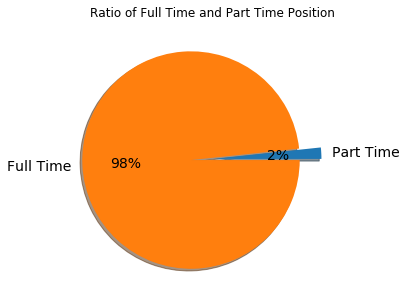

In [211]:
# Ratio of Full Time and Part Time Position.

position = df.groupby('FULL_TIME_POSITION')['CASE_STATUS']
#print(position.count())
total = position.count()[0] + position.count()[1]
#print(total)
l = ['Part Time', 'Full Time']
l1 = [(position.count()[0]/total), (position.count()[1]/total)]
plt.figure(figsize=(10,5), )
plt.pie(labels=l, x=l1, autopct='%.f%%', explode=[0,0.2], shadow=True,textprops={'fontsize':14})
plt.title('Ratio of Full Time and Part Time Position')
plt.show()

# Top 20 Companies Hiring Data Scientists

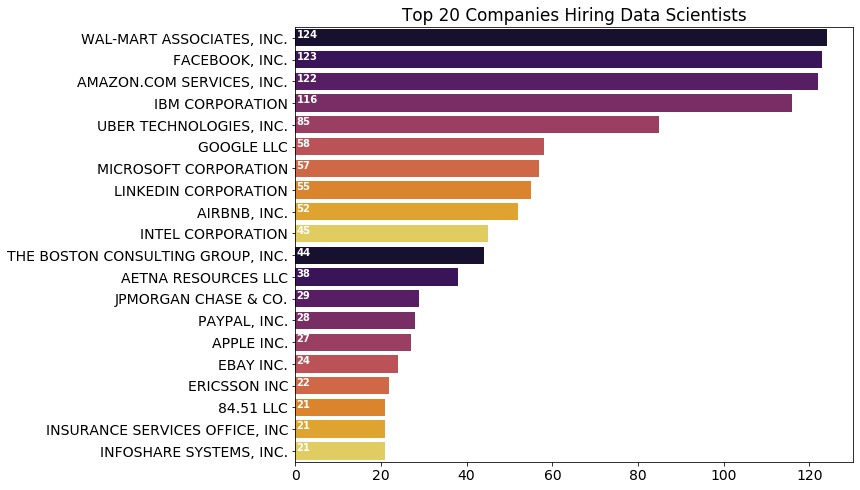

In [287]:
data_peeps=df.dropna(subset=['JOB_TITLE'])
data_peeps=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA')]
data_scientists=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA SCIENTIST')]
plt.figure(figsize=(10,8))
data_coun=data_scientists['EMPLOYER_NAME'].value_counts()[:20]
ax=sns.barplot(y=data_coun.index,x=data_coun.values,palette=sns.color_palette('inferno',10))
for i, v in enumerate(data_coun.values): 
    ax.text(.3, i, v,fontsize=10,color='white',weight='bold')
plt.title('Top 20 Companies Hiring Data Scientists')
plt.show()

# Number of Applicants with respect to Case Status

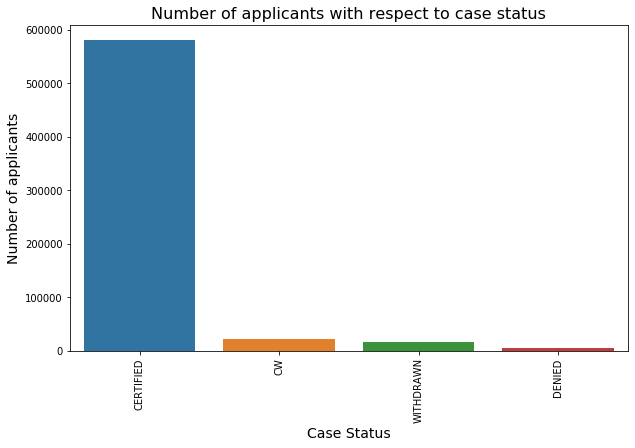

In [136]:
status = df['CASE_STATUS'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(status.index, status.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Case Status', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to case status", fontsize=16)
plt.show()

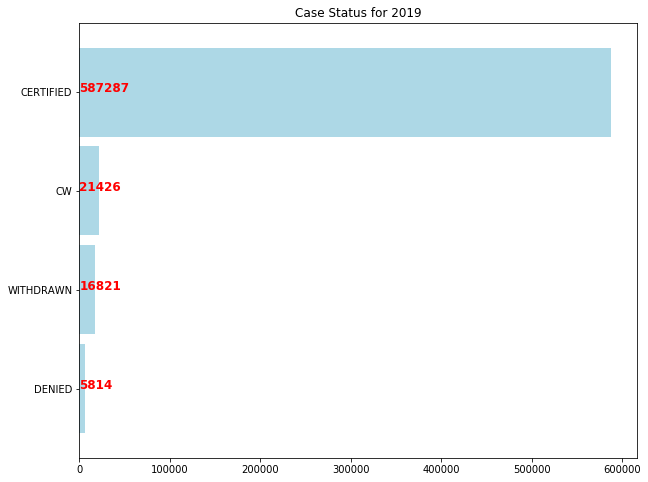

In [278]:
plt.figure(figsize=(10,8))
ax=df['CASE_STATUS'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color='lightblue')
for i, v in enumerate(df['CASE_STATUS'].value_counts().sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='r',weight='bold')
plt.title('Case Status for 2019')
plt.show()

# Top 20 Employers filing H1B

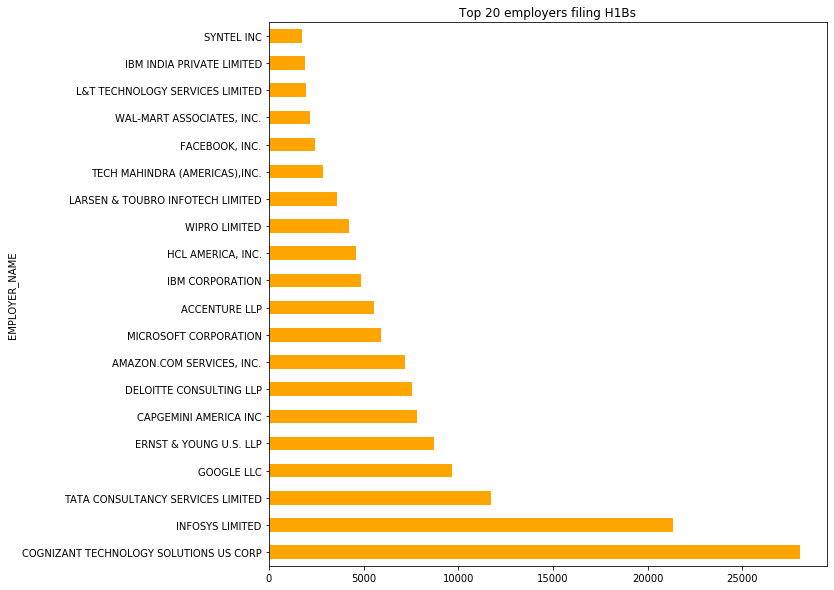

In [138]:
plt.figure(figsize= (10,10))
gh=df.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).plot(kind='barh',title='Top 20 employers filing H1Bs',color='orange')

# H1-B Sponsoring Companies

In [215]:
employer = df['EMPLOYER_NAME'].value_counts()
employer = employer[(employer.values > 1000)]

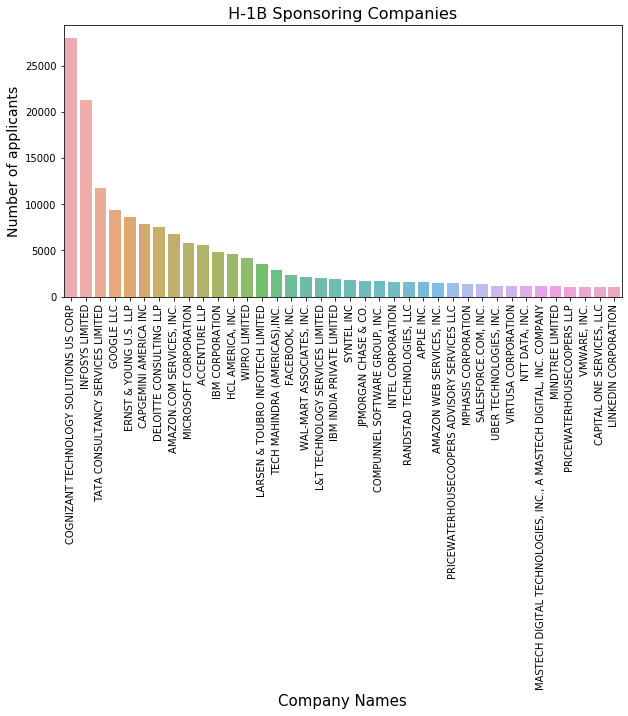

In [216]:
plt.figure(figsize=(10,5))
sns.barplot(employer.index, employer.values, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('Company Names', fontsize=15)
plt.ylabel('Number of applicants', fontsize=14)
plt.title(" H-1B Sponsoring Companies ", fontsize=16)
plt.show()

# Wage Distribution

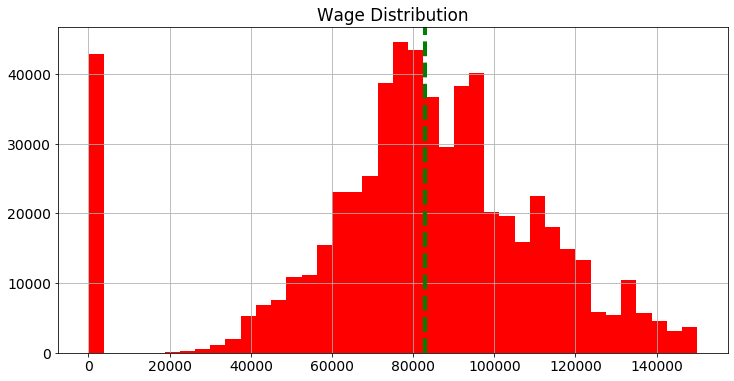

In [286]:
plt.figure(figsize=(12,6))
df[df['PREVAILING_WAGE_1']<150000].PREVAILING_WAGE_1.hist(bins=40,color='red')
plt.axvline(df[df['PREVAILING_WAGE_1']<=150000].PREVAILING_WAGE_1.median(), color='green', linestyle='dashed', linewidth=4)
plt.title('Wage Distribution')
plt.show()

# Salary Distribution for Data Science Engineer

In [284]:
data_peeps=df.dropna(subset=['JOB_TITLE'])
data_peeps=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA')]
data_scientists=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA SCIENTIST')]
data_analyst=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA ANALYST')]
data_eng=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA ENG')]

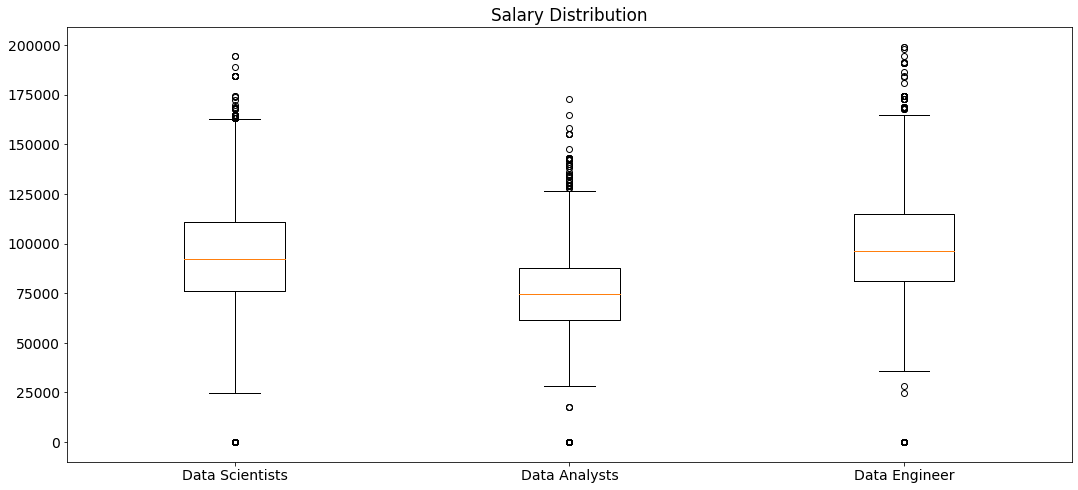

In [285]:
f,ax=plt.subplots(figsize=(18,8))
plt.boxplot([data_scientists[data_scientists['PREVAILING_WAGE_1']<200000].PREVAILING_WAGE_1,data_analyst[data_analyst['PREVAILING_WAGE_1']<200000].PREVAILING_WAGE_1,data_eng[data_eng['PREVAILING_WAGE_1']<200000].PREVAILING_WAGE_1])
ax.set_xticklabels(['Data Scientists','Data Analysts','Data Engineer'])
ax.set_title('Salary Distribution')
plt.show()

# Number of applicants with respect to the Job Title

In [221]:
job = df['SOC_TITLE'].value_counts()
job = job[(job.values>1500)]

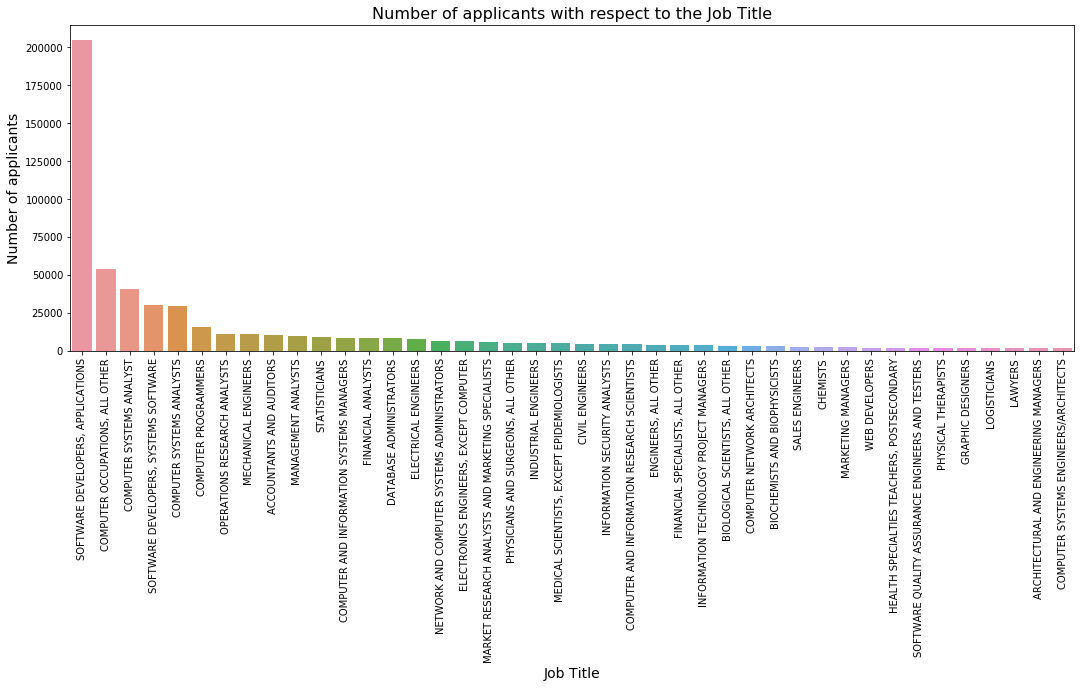

In [222]:
plt.figure(figsize=(18,6))
sns.barplot(job.index, job.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to the Job Title", fontsize=16)
plt.show()

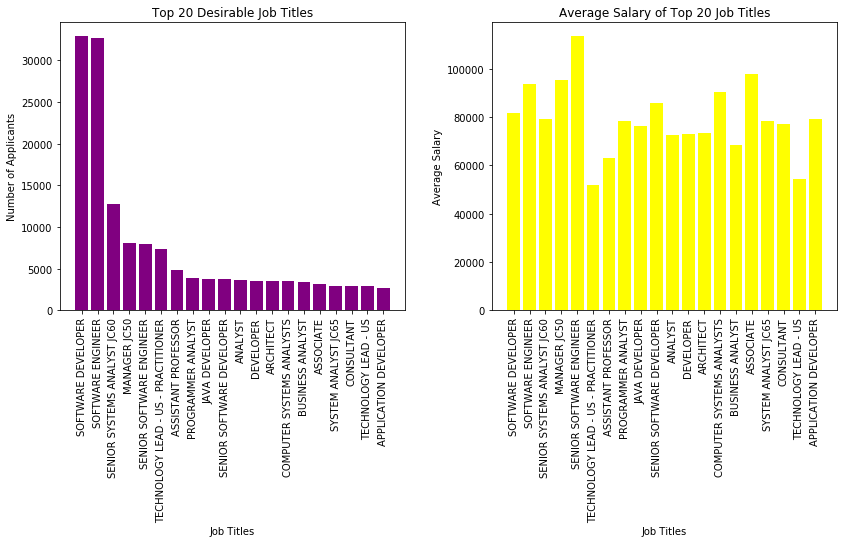

In [281]:
#Top 10 desirable job titles.

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_axes([0,0,.4,.4])
ax2 = fig.add_axes([.5,0,.4,.4])
job_title = df['JOB_TITLE'].value_counts()[:20]

ax1.bar(x=job_title.index, height=job_title[:],color='purple')
ax1.set_xticklabels(labels=job_title.index , rotation=90)
ax1.set_title('Top 20 Desirable Job Titles')
ax1.set_xlabel('Job Titles')
ax1.set_ylabel('Number of Applicants')

# Average Salary of top 10 desirable Job Title.

job_title_avg = []
for i in job_title.index:
    avg = df[df['JOB_TITLE']==i]['PREVAILING_WAGE_1'].mean()
    job_title_avg.append(avg)
    
ax2.bar(x=job_title.index, height=job_title_avg,color='yellow')
ax2.set_xticklabels(labels=job_title.index, rotation=90)
ax2.set_title('Average Salary of Top 20 Job Titles')
ax2.set_xlabel('Job Titles')
ax2.set_ylabel('Average Salary')
plt.show()

# Top 10 States of H1B Application 

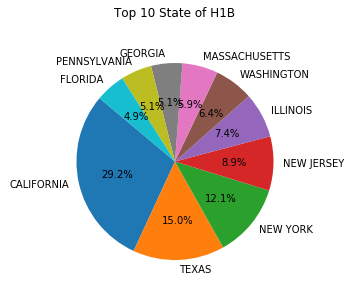

In [227]:
f = df['WORKSITE_STATE_1'].value_counts()[:10]
plt.pie(f.values, labels=f.index,  autopct='%1.1f%%',startangle=140)
#plt.title('Top 10 State of H1B            ')
plt.axis('equal')
plt.title('        Top 10 State of H1B        \n \n   ')
plt.show()

# Number of Applicants with respect to Workplace

In [228]:
work = df['WORKSITE_STATE_1'].value_counts()
place = work[(work.values>5000)]

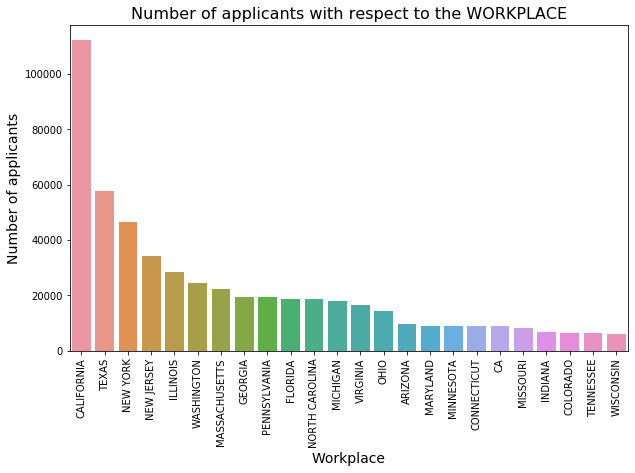

In [229]:
#plt.figure(figsize=(10,6))
plt.subplots(figsize=(10,6))
sns.barplot(place.index, place.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Workplace', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to the WORKPLACE", fontsize=16)
plt.show()

# Number of applicants related to Data Science Job

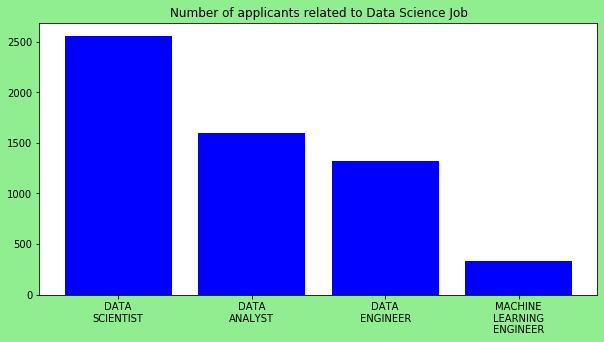


The total number of jobs related to Data Science job profile are-->>	 5806


In [282]:
jobs = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'MACHINE LEARNING ENGINEER']
count = []
# Counting the number of applicants related to each job title.
for var in jobs:
    q = df[df['JOB_TITLE']==var]['JOB_TITLE'].count()
    count.append(q)

job1 = ['DATA\nSCIENTIST', 'DATA\nANALYST', 'DATA\nENGINEER', 'MACHINE\nLEARNING\nENGINEER']    
plt.figure(figsize=(10,5), facecolor='lightgreen')
plt.bar(x=job1, height=count,color='blue')
plt.title( 'Number of applicants related to Data Science Job')
plt.show()
print()
print(f"The total number of jobs related to Data Science job profile are-->>\t {sum(count)}")

# Salary Distribution

Text(0.5, 1.0, 'H-1B Salary Distribution')

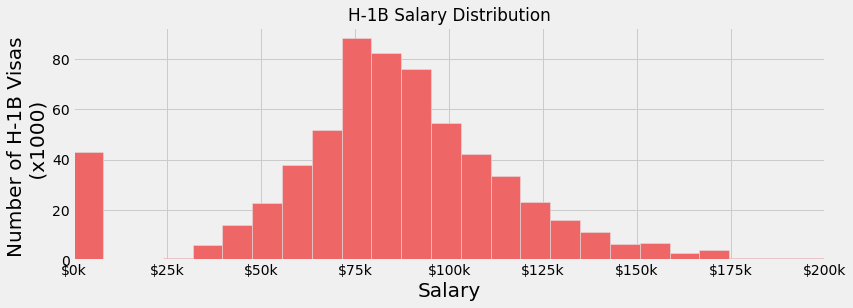

In [283]:

import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.hist(df['PREVAILING_WAGE_1'],bins=200, edgecolor='#E6E4E6', color='#EE6666');
plt.xlim([0, 200000])

def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)
def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
formatterUSD = FuncFormatter(thousandUSD)
formatter = FuncFormatter(thousand)

plt.xlabel('Salary',size=20)
plt.ylabel('Number of H-1B Visas \n (x1000)', size=20)
ax.xaxis.set_major_formatter(formatterUSD)
ax.yaxis.set_major_formatter(formatter)
ax.set_title('H-1B Salary Distribution')